In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.datasets import fetch_openml
import seaborn as sns
import os
import sys
HELPERS_PATH = os.path.join("..", "Functions and Packages")
sys.path.append(HELPERS_PATH)
from helpers import visualization, preprocessing

File exists


### Glancing at Data

In [2]:
happiness_data = pd.read_csv("../data/happiness.csv")
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Let's round the **Score** column of the `happiness_data` `DataFrame` so that we can classify into it.  

In [3]:
#Rounding the Score column
happiness_data.Score = happiness_data.Score.apply(lambda x: round(x))

Let's look at the `info`

In [4]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    int64  
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 11.1+ KB


Now, let's get some statistical analysis with `describe`

In [5]:
happiness_data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.358974,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.141299,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,5.000000,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.000000,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.000000,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,8.000000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Let's create a `sns.heatmap` of the correlations between features to get a general idea.

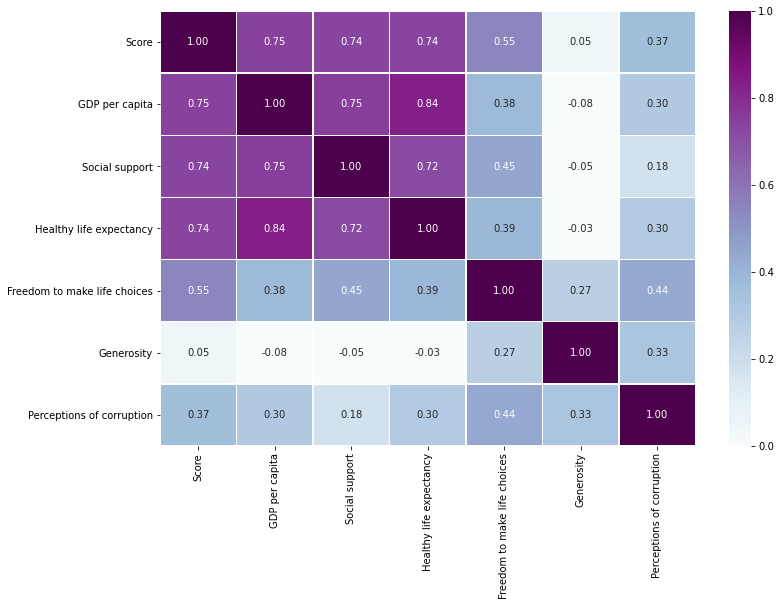

In [6]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(happiness_data.drop(labels="Overall rank", axis=1).corr(), cmap = "BuPu", annot = True, linewidth = .5, fmt = ".2f", vmin = 0, vmax = 1);

### Visualizing Geo Data with Plotly

First, we need to define our **data** dictionary, which houses all the properties of the data we're giving to plotly, as well as some parts of how we are outputting it.

<p id="e50e" class="im in es io b fr ip iq ir fu is it iu iv iw ix iy iz ja jb jc jd je jf jg jh el fp" data-selectable-paragraph=""><code class="ib jv jw jx jy b">type</code>:  Defines the type of the map(choropleth)<br><code class="ib jv jw jx jy b">locations</code>: Names of all states<br><code class="ib jv jw jx jy b">locationmode</code>: Specify the location by giving a Country name<br><code class="ib jv jw jx jy b">colorscale</code>: Displays a color map. <em class="jr">(Refer below for more colorscales)</em><br><code class="ib jv jw jx jy b">text</code>: Displays a text when hovering over the map for each state element<br><code class="ib jv jw jx jy b">z</code> : Integer value which displays ‘Store Count’ for each state element<br><code class="ib jv jw jx jy b">colorbar</code> : Title for the right sidebar</p>

In [7]:
import chart_studio.plotly as pl
import plotly.graph_objs as gobj
import pandas as pd
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [8]:
#initializing the data variable
data = dict(type = 'choropleth',
            locations = happiness_data["Country or region"],
            locationmode = 'country names',
            colorscale= 'Portland',
            text= happiness_data["Overall rank"],
            z=happiness_data.Score,
            colorbar = {'title':'Happiness Level', 'len':200,'lenmode':'pixels' })

Initialize the **layout**.  Scope can have 7 values:  “world” | “usa” | “europe” | “asia” | “africa” | “north america” | “south america” .

In [9]:
#initializing the layout variable
layout = dict(geo = {'scope':'world'})

In [10]:
# Initializing the Figure object by passing data and layout as arguments.
col_map = gobj.Figure(data = [data],layout = layout)

#plotting the map
iplot(col_map)

### Binary Classifiers

Let's make this into a **binary classification** problem by having a 1 or a 0 for the happiness score.  We'll say if it's over 5, they're happy.

In [11]:
#Make Score column binary
#Key thing to note is that return line!  If you don't return value, the apply function won't know what to do!
def make_binary(val):
    if val <= 5:
        val = 0
    else: 
        val = 1
    return val

### Binary Classifiers

* Logistic Regression
* Perceptron
* Support Vector Machines

#### SGD Classifiers

```SGDClassifier``` is stochastic gradient descent, an optimization technique
##### What's a Gradient Descent?
* Think of it as taking random guesses until it optimizes (minimizing) the sum of the squared residuals
* [StatQuest Video on SGDs](https://www.youtube.com/watch?v=sDv4f4s2SB8)
* Takes the derivative of the Sum of the Squared Residuals with respect to intercept and slope (the partials).  In other words, we're calculating the **gradient**
$$
\frac{d}{d \mbox{ intercept}} \mbox{Sum of Squared Residuals}
$$


$$
\frac{d}{d \mbox{ slope}} \mbox{Sum of Squared Residuals}
$$


* Takes smaller steps when that number gets close to zero to find the optimal intercept.  
* A smaller **learning rate** means a better gradient descent, but also more taxing on computer
    * In theory, don't need to worry too much about learning rate (see vid for more info on why
    
To summarize:  
* Pick a line through the points.  How are we doing?  Not so good?  Take a big step.  
* Pick a new line.  Closer.  Take a smaller step
* Keep going til you're super close to perfection

##### What's a STOCHASTIC Gradient Descent?
* Gradient Descent **is slow for Big Data**
* Picks random samples of a bunch of points and draws a line through them (**mini batches**)
* Much **faster** than Gradient Descent alone

With SGD, when you get new data, you can **quickly adapt** rather than going back to the beginning


##### Using an SGD in Sklearn

Time to split into a **training and test** set.  Do we want to use stratified or random sampling?  I'm thinking random.

For the ```SGD``` we need to remove the categorical features.

In [12]:
from sklearn.model_selection import train_test_split

X = happiness_data.drop(labels = "Score", axis=1)
y = happiness_data.Score.apply(make_binary)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline 
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
#Custom Transformer that extracts columns passed as argument to its constructor 
class FeatureRemover( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do - In this case, return the DF without the features we give it (we'll remove the categorical features)
    def transform( self, X, y = None ):
        return X.drop(labels = self._feature_names, axis=1)
    
#Pass the categorical features to the constructor in the pipeline for the feature union
#Right now, we're gonna predict with SGD just with numerical features to simplify the EQN
numerical_pipeline = Pipeline( steps = [ ( 'num_selector', FeatureRemover(["Country or region"])), 
                                         ( 'sgd', sgd)
                                       ] )
#Fit the pipeline
numerical_pipeline.fit(X_train, y_train)

#Use the pipeline to make predictions
y_pred_num = numerical_pipeline.predict(X_test)

#Show the predictions
y_pred_num

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

### Measuring Performance

One important thing to note before we get into it!  When using `sklearn.metrics`, we are **almost always** using the TRAINING set.

In [14]:
#Creating a classifier for later use throughout this learning section
X_train, X_test, y_train, y_test = train_test_split(X.drop(labels = "Country or region", axis = 1,), y)

sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

#### `StratifiedKFolds`

One way to measure performance for classification problems is using sklearn's `StratifiedKFold`, which uses **cross validation**

First, we must make the necessary imports.  From `model_selection` we import `StratifiedKFold`, and from `base` we import `clone`.  We will clone our model in order to get an adequate representation of what we will be doing.

We start by importing, and constructing the `StratifiedKFold` object.

In [15]:
#Necessary Imports
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

#Stratified K Fold Object Construction
skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(X,y)

5

Parameters to the `.split()` method which will generate the training and test indices we will cross-validate on **must be numpy arrays with only numerical features.**  Loop through the indices produced by the `.split()` method on the `X` and `y`, and then used the *cloned model* to make predictions with each of the folds.  Finally, print the percentage of predictions correct.

In [16]:
#Convert DataFrames to Numpy arrays with only numerical features using .drop and .values
X_arr = X.drop(labels = "Country or region", axis = 1).values
y_arr = y.values

#Loop through the training and test indices produced by the .split method
for train_index, test_index in skf.split(X_arr, y_arr):
    #Create the cloned model (our SGD model was named sgd)
    clone_sgd = clone(sgd)
    
    #Create the folds for X_train, X_test, y_train, and y_test
    X_train_folds = X_arr[train_index]
    y_train_folds = y_arr[train_index]
    X_test_folds = X_arr[test_index]
    y_test_folds = y_arr[test_index]
    
    #Fit and predict with the cloned model
    clone_sgd.fit(X_train_folds, y_train_folds)
    y_pred = clone_sgd.predict(X_test_folds)
    
    #Print the percent correct
    avg = sum(y_pred == y_test_folds) / len(y_pred)
    print(f"Percent of Predictions Correct: {round(avg*100,2)}%")

Percent of Predictions Correct: 100.0%
Percent of Predictions Correct: 100.0%
Percent of Predictions Correct: 48.39%
Percent of Predictions Correct: 54.84%
Percent of Predictions Correct: 54.84%


#### Cross-Validation

Alternatively, let's use `cross_val_score()` function to do Kfold cross validation where $K=3$.  First, we import `cross_val_score` from sklearn's `model_selection` module.

In [17]:
from sklearn.model_selection import cross_val_score

Then, we use the `cross_val_score` function, which takes an `estimator`, an `X`, a `y`, a `cv` and a `scoring` metric.  Some of these are optional, but I find these are the most important one.  Similarly, there are other **kwargs** that can be used if you want.  But I'm gonna stick with these.

In [18]:
scores = cross_val_score(estimator = clone_sgd, X = X_train, y = y_train, cv = 5, scoring = "accuracy")
scores

array([0.91666667, 0.95833333, 0.69565217, 0.65217391, 0.91304348])

Now, let's look at a dumb classifier.

In [19]:
#Import BaseEstimator for custom Classifier
from sklearn.base import BaseEstimator

class NeverHappyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    #Since it's binary, our labels are either one or zero, and we will return labels of all zeroes with an amount of samples corresponding to the amount of samples in x, and one column.  I.e. a column vector of our labels. 
    def predict(self, X):
        return np.zeros(shape=(len(X), 1), dtype=int)

In [20]:
#Construct the never_happy classifier
never_happy_classifier = NeverHappyClassifier()

#Cross-validate
scores = cross_val_score(estimator = never_happy_classifier, X = X_train, y = y_train, cv = 5, scoring = "accuracy")
scores

array([0.33333333, 0.54166667, 0.60869565, 0.39130435, 0.65217391])

What the donkey?!  Half the time this never-happy classifier is correct.  Well, that make's since, considering about half of our samples are happy.  

But imagine if classes were imbalanced.  Think if we were doing a heart disease problem.  We test a million people, and 990,000 of them **do not** have heart disease.  Then we'd have an issue with this type of classification.

**TLDR - Accuracy is generally not the best method for evaluating classifiers**  The only time accuracy *is a good measure* is when we have a **balanced dataset**

#### Confusion Matrix

I have a custom function for this in `visualization.py`, and it is `visualizeConfusionMatrix(y_actual, y_pred)`

First, we need to generate the **y_train_pred**.

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(estimator = sgd, X = X_train, y = y_train, cv = 5)

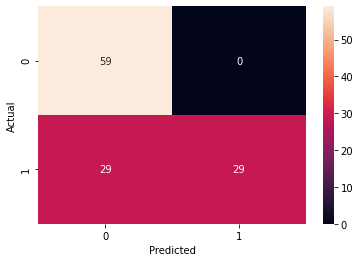

In [22]:
confusion_matrix = visualization.visualizeConfusionMatrix(y_actual= y_train, y_pred= y_train_pred)


#### F1

In [24]:
#Import f1_score from the metrics module
from sklearn.metrics import f1_score

#Pass y_true and y_pred
f1_score(y_true = y_train, y_pred= clone_sgd.predict(X_train))

0.4736842105263158

Considering our Confusion Matrix is pretty good, that's consistent.  A damn good F1 right there.

#### Precision/Recall Curves

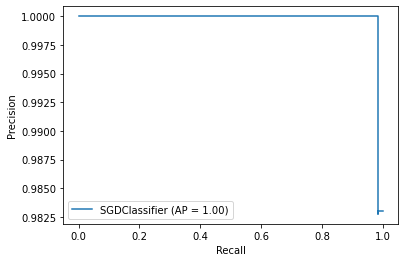

In [29]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(estimator = sgd, X = X_train, y = y_train);

To get the precision and recall curves of some classifier, first run a `cross_val_predict` and then use the `precision_score` and `recall_score` functions, passing in the true y values and the predicted ones

In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score


#Predict with cross_val_predict
y_preds_sgd = cross_val_predict(estimator = sgd, X = X_train, y = y_train)

#Precision
ps = precision_score(y_true = y_train, y_pred = y_preds_sgd)
print(f"Precision Score: {ps}")

#Recall
rs = recall_score(y_true = y_train, y_pred = y_preds_sgd)
print(f"Recall Score: {rs}")

Precision Score: 0.75
Recall Score: 0.6724137931034483


#### ROC Curves

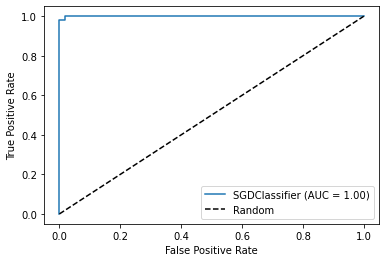

In [32]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(estimator = sgd, X = X_train, y = y_train);
plt.plot([0,1], [0,1], 'k--', label = "Random");
plt.legend();

This is considered a **perfect** ROC curve, because it is at one and is as far away from the random classifier as possible.

### Multiclass Classification

What happens if we don't just want to see when people are or aren't happy?  How often are labels really binary?  Let's say we want to label every country according to their happiness, integer label, on a scale of 1-10.  Seems much more realistic.  And more difficult.

#### Strategies

#### **One vs. Rest (OVR)**

* One binary classification problem per class 

$$ \mbox{Number of Classification Problems} = n!$$


Say we have three classes:  Red, green and blue.  The classification problems would be: 

* Red vs not red
* Green vs not green
* Blue vs not blue

What types of models?

*Probability Models*
* Logistic Regressions
* Perceptrons

Usage in ```sklearn```: 

In [33]:
#Logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# Define model
model = LogisticRegression(multi_class='ovr')
# Fit model
model.fit(X, y)
# Make predictions
yhat = model.predict(X)

In [34]:
# Logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# Define dataset
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# Define model
model = LogisticRegression()
# Define the ovr strategy
ovr = OneVsRestClassifier(model)
# Fit model
ovr.fit(X, y)
# Make predictions
yhat = ovr.predict(X)

#### **One vs. One (OVO)**

* One binary classification problem per class **versus every other class** 

$$ \mbox{Number of Classification Problems} = \frac{n(n-1)}{2}$$

Say we have four classes:  Red, green, yellow and blue.  The classification problems would be: 

* Red vs green
* Red vs yellow
* Red vs blue
* Green vs red
* . . . And so on

What types of models?

*Kernel Based Algorithms*
* SVMs, like the `SVC`

Usage in ```sklearn```:

In [35]:
# SVM for multi-class classification using built-in one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
# define dataset
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = SVC(decision_function_shape='ovo')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)

In [36]:
# SVM for multi-class classification using one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = SVC()
# define ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(X, y)
# make predictions
yhat = ovo.predict(X)

```sklearn``` now **automatically infers** based on the algorithm you choose whether to use OVO or OVR.  

Let's look at an example using OVR automatically inferred with a `LinearSVC`

Side note about `LinearSVC` - it is faster than other `SVC`, but also probably not as good at estimating.

In [37]:
# y is no longer binary
X = happiness_data.drop(
    labels=['Score', 'Country or region', 'Overall rank'], axis=1)
y = happiness_data.Score

X_train, X_test, y_train, y_test = train_test_split(X, y)
# Uncomment to show x and y
#X, y

In [38]:
# Import LinearSVC from support vector machine (svm) module of sklearn
from sklearn.svm import LinearSVC

# Construct the model
svc = LinearSVC()

# Fit the model
svc.fit(X=X_train, y=y_train)

#Show the properties, what type of multi_class?
svc.multi_class

'ovr'

In [39]:
#Predict
predictions = svc.predict(X_test)

#Comparing to actual values
for prediction, actual in zip(predictions, y_test):
    print(f"Prediction: {prediction}, Actual: {actual}")

Prediction: 5, Actual: 6
Prediction: 4, Actual: 5
Prediction: 6, Actual: 6
Prediction: 5, Actual: 5
Prediction: 6, Actual: 7
Prediction: 4, Actual: 4
Prediction: 4, Actual: 5
Prediction: 5, Actual: 5
Prediction: 4, Actual: 4
Prediction: 5, Actual: 6
Prediction: 6, Actual: 5
Prediction: 6, Actual: 6
Prediction: 6, Actual: 6
Prediction: 6, Actual: 6
Prediction: 5, Actual: 3
Prediction: 4, Actual: 5
Prediction: 5, Actual: 5
Prediction: 6, Actual: 6
Prediction: 5, Actual: 4
Prediction: 5, Actual: 6
Prediction: 6, Actual: 6
Prediction: 5, Actual: 6
Prediction: 4, Actual: 4
Prediction: 5, Actual: 5
Prediction: 7, Actual: 7
Prediction: 7, Actual: 7
Prediction: 4, Actual: 5
Prediction: 5, Actual: 4
Prediction: 4, Actual: 3
Prediction: 7, Actual: 7
Prediction: 7, Actual: 8
Prediction: 6, Actual: 6
Prediction: 6, Actual: 6
Prediction: 5, Actual: 4
Prediction: 4, Actual: 3
Prediction: 4, Actual: 3
Prediction: 5, Actual: 5
Prediction: 6, Actual: 6
Prediction: 5, Actual: 5


If we want a more programmatic explanation of how we did, we could use an `accuracy` metric

In [40]:
cross_val_score(svc, X, y, cv=5, scoring = 'accuracy')

/Users/lukeanglin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



array([0.40625   , 0.67741935, 0.5483871 , 0.58064516, 0.51612903])

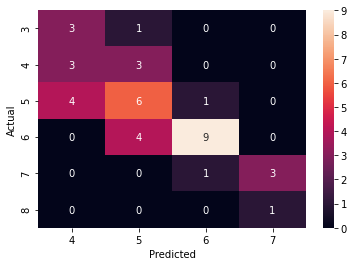

In [41]:
visualization.visualizeConfusionMatrix(y_actual = y_test, y_pred= predictions);

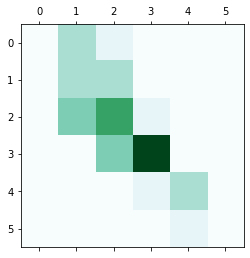

In [42]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, predictions)
plt.matshow(A=conf_mat, cmap=plt.cm.BuGn)

### Multilabel Classification

What if we wanted to predict **multiple classes** from a sample?  For instance, tell me the GDP per capita and the happiness score.  This would be called **Multilabel Classification**

#### K Nearest Neighbors

![](https://miro.medium.com/max/1000/0*sYMSaIon56Qng2hF.png)

In [56]:
#Create new wealth column for multilabeled problem
happiness_data["Wealthy"] = np.where(happiness_data['GDP per capita'] > 0.9, 1, 0)
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Wealthy
0,1,Finland,8,1.340,1.587,0.986,0.596,0.153,0.393,1
1,2,Denmark,8,1.383,1.573,0.996,0.592,0.252,0.410,1
2,3,Norway,8,1.488,1.582,1.028,0.603,0.271,0.341,1
3,4,Iceland,7,1.380,1.624,1.026,0.591,0.354,0.118,1
4,5,Netherlands,7,1.396,1.522,0.999,0.557,0.322,0.298,1


In [89]:
#Import from neighbors module
from sklearn.neighbors import KNeighborsClassifier

#Set up new X 
if 'GDP per capita' in X: 
    X = X.drop(labels = "GDP per capita", axis =1)

wealthy = happiness_data["Wealthy"]
prettyHappy = happiness_data['Score'] > 6

#Set up new y
y = np.c_[wealthy, prettyHappy]

#Create new train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [90]:
#Construct KNN
knn = KNeighborsClassifier()

#Fit
knn.fit(X_train, y_train)

#Predict on some random X_test value and then show the real y_test value
print(f"Prediction: {knn.predict(X_test)}")
print(f"Actual: {y_test}")

Prediction: [[0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]
Actual: [[0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]]


Sweet! Time for a `cross_val_predict` and an `f1_score`.  Because we are doing multilabeled classification, it is **crucial** that you pass the `average = 'macro'` parameter to the `f1_score` function.

In [92]:
#Save preds to a var
knn_cv_train_preds = cross_val_predict(estimator = knn, X = X_train, y = y_train)

# Get an f1 score - 
from sklearn.metrics import f1_score
score = f1_score(y_true = y_train, y_pred=knn_cv_train_preds, average = 'macro')
score 

0.7936507936507937

Okay.  Now let's try the same classifier, but with a `RandomizedSearchCV`

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
#Param Grid
param_grid = {
    'n_neighbors': [3, 5, 8, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Randomized search CV
randomized_search = RandomizedSearchCV(
    estimator=knn, param_distributions=param_grid, scoring='f1_macro')

# Fit
randomized_search.fit(X = X_train, y = y_train)

# See score
randomized_search.best_score_

0.8233000815609511

Better.  Not great.  But better.  And we don't have highly correlated variables, so not too bad!